# Homework Linear Regression
The dataset you are working is Boston Housing Price
The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target.
For this assignment, your task is to:

- 1-[x] Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

- 2-[x] Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!

- 3-[x] Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

- 4-[ ] Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: from sklearn.model_selection import train_test_split

Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

- 5-[ ] Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

- 6-[ ] Compute, Mean-Square-Error (MSE) and R Squared score of your Model

Hint: from sklearn.metrics import r2_score

Hint: from sklearn.metrics import mean_squared_error

In [15]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import visuals  as vs
import warnings
warnings.filterwarnings('ignore') 

boston = load_boston()

data = bos = pd.DataFrame(boston.data)
cols = bos.columns = boston.feature_names
Prices = bos['MEDV'] = boston.target
features = bos.drop('MEDV', axis = 1)
array = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
df = bos[array]
print(boston.data.shape)
print(bos.head())

(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
print("Boston housing dataset has {} data points with {} variables each.".format(*bos.shape))

Boston housing dataset has 506 data points with 14 variables each.


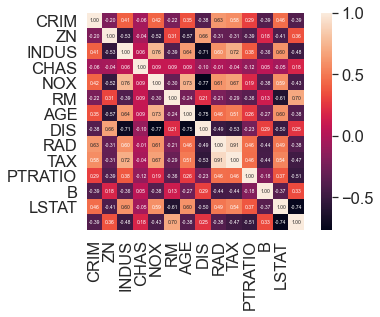

In [4]:
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
Heatmap = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 5},
                yticklabels=cols,
                xticklabels=cols)

In [5]:
Minimum_Price = np.amin(Prices)
Maximum_Price = np.amax(Prices)
Average_Price = np.mean(Prices)
Median_Price = np.median(Prices)
StDev_Price = np.std(Prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum Price: ${}".format(Minimum_Price)) 
print("Maximum Price: ${}".format(Maximum_Price))
print("Average Price: ${}".format(Average_Price))
print("Median Price ${}".format(Median_Price))
print("Standard Deviation of prices: ${}".format(StDev_Price))

Statistics for Boston housing dataset:

Minimum Price: $5.0
Maximum Price: $50.0
Average Price: $22.532806324110677
Median Price $21.2
Standard Deviation of prices: $9.188011545278203


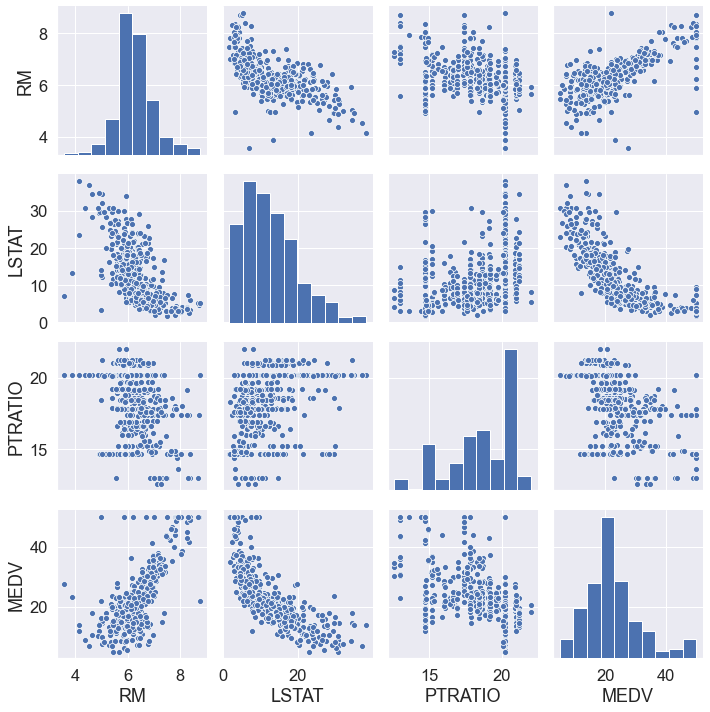

In [7]:
%matplotlib inline
sns.pairplot(df, height=2.5)
plt.tight_layout()

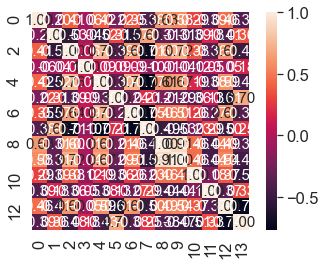

In [2]:
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15})

In [13]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    # return score
    return score

pass


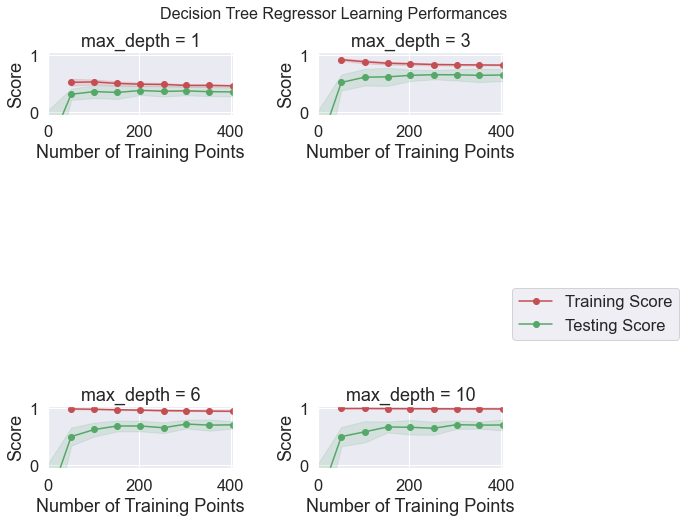

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, Prices, test_size=0.25, random_state = 0)
print("pass")
vs.ModelLearning(features, Prices)

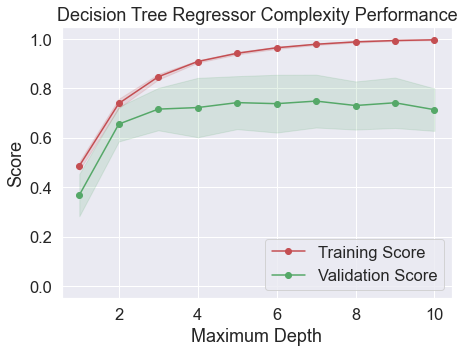

In [17]:
vs.ModelComplexity(X_train, y_train)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    

    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)

    return grid.best_estimator_

In [20]:
reg = fit_model(X_train, y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 8 for the optimal model.


In [21]:
client_data = [[5, 17, 15, 4, 32, 22, 4, 32, 22, 4, 32, 22, 12], # Client 1
               [4, 32, 22, 4, 32, 22, 4, 32, 22, 24, 4, 32, 22], # Client 2
               [8, 3, 12, 32, 22, 4, 32, 22, 4, 32, 22, 24, 4]]  # Client 3
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $29.80
Predicted selling price for Client 2's home: $19.33
Predicted selling price for Client 3's home: $50.00


In [23]:
vs.PredictTrials(features, Prices, fit_model, client_data)

Trial 1: $21.00
Trial 2: $23.21
Trial 3: $31.00
Trial 4: $10.20
Trial 5: $21.90
Trial 6: $21.90
Trial 7: $21.90
Trial 8: $50.00
Trial 9: $49.15
Trial 10: $36.95

Range in prices: $39.80
